# Applied Machine Learning: Mushroom Classifier 


## Overview

### Purpose:
The purpose of this assigment is to gain experience with the KNN and PCA algorithms. Besides, the ability to construct a well-organized and documented notebook will be calculated too. The data set will be used in this assignment is the mushroom dataset and the details as follow:

### Objective:
The objective for this assignment is to predict whether a mushroom is edible or poisonous by using a full data and PCA reduced data through RandomForestClassifier and LogisticRegression model. Then the comparison among the accuracy, precision, recall and training time were taken place for both models. 


### Data set information:

#### Sources: 

- Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), 
  New York: Alfred A. Knopf
- Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
- Date: 27 April 1987

There were 8124 instances and 22 attributes wheree all attributes are nominally valued.

Missing Attribute Values: 2480 of them (denoted by "?"), all for
   attribute #11.
   
Class Distribution: 
    --    edible: 4208 (51.8%)
    -- poisonous: 3916 (48.2%)
    --     total: 8124 instances
    
Attribute Information: (classes: edible=e, poisonous=p)

1. cap-shape:                bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
                                  
2. cap-surface:              fibrous=f, grooves=g, scaly=y, smooth=s
3. cap-color:                brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e,                                white=w, yellow=y
4. bruises:                  bruises=t,no=f
5. odor:                     almond=a, anise=l, creosote=c,fishy=y,foul=f, musty=m, none=n, pungent=p,                              spicy=s
6. gill-attachment:          attached=a, descending=d, free=f, notched=n
7. gill-spacing:             close=c, crowded=w, distant=d
8. gill-size:                broad=b, narrow=n
9. gill-color:               black=k, brown=n, buff=b, chocolate=h,gray=g, green=r, orange=o, pink=p,                              purple=u, red=e, white=w, yellow=y
10. stalk-shape:             enlarging=e,tapering=t
11. stalk-root:              bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
14. stalk-color-above-ring:   brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w,                                 yellow=y
15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type:                partial=p, universal=u
17. veil-color:               brown=n, orange=o, white=w, yellow=y
18. ring-number:              none=n, one=o, two=t
19. ring-type:                cobwebby=c, evanescent=e,flaring=f,large=l, none=n, pendant=p,                                         sheathing=s, zone=z
20. spore-print-color:        black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u,                                   white=w, yellow=y
21. population:               abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
22. habitat:                  grasses=g, leaves=l, meadows=m, paths=p, urban=u,waste=w, woods=d

To achieve the goal of this assignment, I followed the steps below:

   1. I imported general library. Then I read the data from the file named "agaricus-lepiota.data" and saved as df1. Because there were no header so header=None is used. Then I viewed the data, it has 8124 rows × 23 columns. I checked the categories for each column then assigned the name for columns base on the above attributes information. I plotted the graph for each column.
   
   2. Since the 'stalk_root' column has 2480 missing values denoted by "?", I use the KNN algorithm to impute missing values in the dataset. I change the data type from object type to category type. Next, I created  two new dataframes from df1 called df1_nomissing and df1_missing which represents the dataframe with no missing values and dataframe with missing values only. The dimension of df1_nomissing is 5644 rows × 24 columns and df1_missing is 2480 rows × 24 columns. After that I used `OneHotEncoder` and `LabelEncoder`. for the feature data and response data.

   3. Choose the best k without weights parameter and with weights parameter in `KNeighborsClassifier`. Then, perform the cross-validtion using accuracy as the test metric. Apply the best k to predict the missing value called pred. After that, I converted the obtained pred values back to letter by using `inverse_transform()` and put it back as a new collumn('stalk_root2') into the dataframe of df1_missing and save it as df1_missing2. To impute the missing values back into the original data set, I used the merge method to combine the df1_col_arrange with df1_missing2 on 'num' column. From merged data, I dropped the unneccesary columns to form a completed dataframe called full_data. 

   4. For preparing the data in model training, I selected the feature data and response as feature_x and response respectively. After this, I did `OneHotEncoder` and `LabelEncoder`to the feature_x and response. Then I applied the encoded feature x and encoded response to split the data into X_train, X_test, y_train and y_test using train_test_split. The X_train and y_train are fitted in RandomForestClassifier model and LogisticRegression model. The time of fitting for both model were taken for comparing the time it takes to complete a model training through the magic command %% time.  Besides, the class_distribution were predicted with these models.  Computation for accuracy_score, precision_score and recall_score were performed too. 
    
   5. In order to preserve 95% of the variance through dimensionality reduction using PCA. I calculate d which is minimum number of dimensions required to preserve 95% is 38. Train two new models for this PCA reduced dataset, a RandomForestClassifier model and LogisticRegression model called clf_model2 and lr_model2. Again, time of the training of these two models were calculated as above. Computation for accuracy_score, precision_score and recall_score were performed again.
    
   6. Perform the final analysis
   7. Conclusion
    

## Libraries Import

Import some common library: 


In [1]:
# General import
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Load Data and View

Read the data from the file named "agaricus-lepiota.data" and saved as df1. Because there was no header, so header=None is used. Next, view the df1 using head()

In [2]:
# Read the Mushroom data set from file "agaricus-lepiota.data". There is no name for the header, so header=None
filename1= "agaricus-lepiota.data"
df1 = pd.read_csv(filename1, sep=",", header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Explore Data

Explore data by checking the categories, then assign the column name

In [3]:
# check the categories for each columns
for col in df1.columns.values:
    print(col, df1[col].unique())

0 ['p' 'e']
1 ['x' 'b' 's' 'f' 'k' 'c']
2 ['s' 'y' 'f' 'g']
3 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
4 ['t' 'f']
5 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
6 ['f' 'a']
7 ['c' 'w']
8 ['n' 'b']
9 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
10 ['e' 't']
11 ['e' 'c' 'b' 'r' '?']
12 ['s' 'f' 'k' 'y']
13 ['s' 'f' 'y' 'k']
14 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
15 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
16 ['p']
17 ['w' 'n' 'o' 'y']
18 ['o' 't' 'n']
19 ['p' 'e' 'l' 'f' 'n']
20 ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
21 ['s' 'n' 'a' 'v' 'y' 'c']
22 ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [4]:
# Assign the columns name base on the categories in each column
df1.columns = ['class_distribution','cap_shape', 'cap_surface', 'cap_color', 
               'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill-size',
               'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface-above_ring', 
               'stalk_surface_below_ring', 'stalk_color_above_ring',
               'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 
               'ring_type', 'spore_print_color', 'population','habitat']
df1

,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill-size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


e    4208
p    3916
Name: class_distribution, dtype: int64


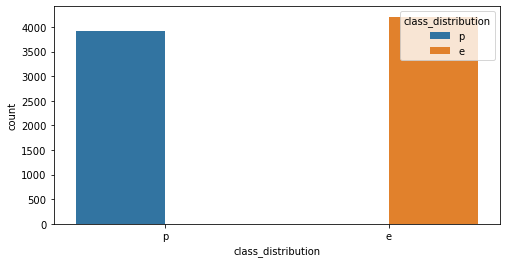

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap_shape, dtype: int64


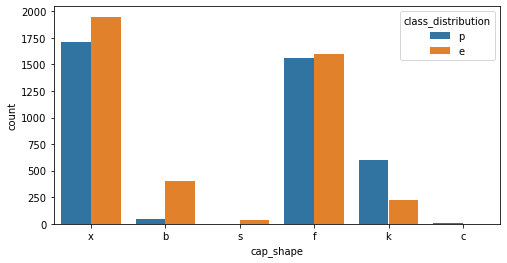

y    3244
s    2556
f    2320
g       4
Name: cap_surface, dtype: int64


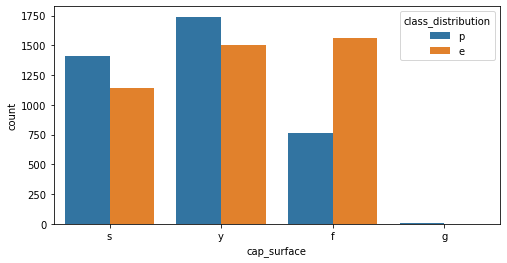

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap_color, dtype: int64


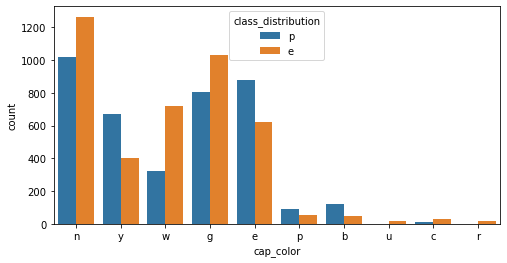

f    4748
t    3376
Name: bruises, dtype: int64


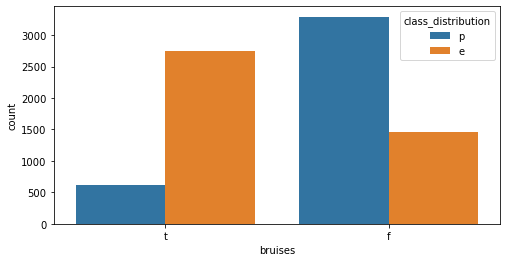

n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64


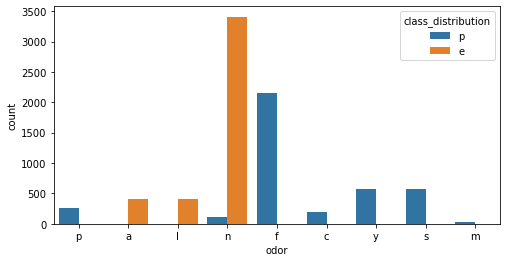

f    7914
a     210
Name: gill_attachment, dtype: int64


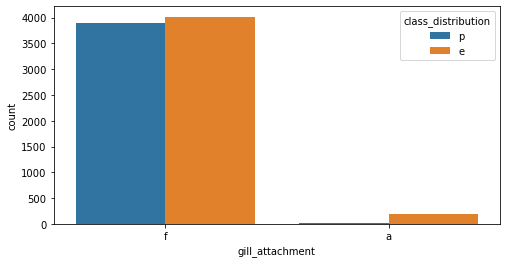

c    6812
w    1312
Name: gill_spacing, dtype: int64


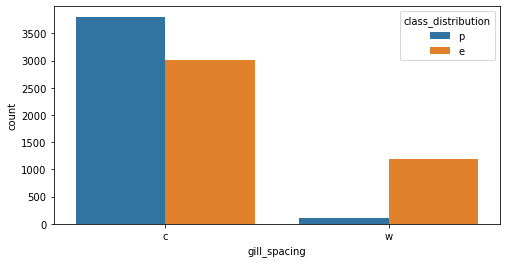

b    5612
n    2512
Name: gill-size, dtype: int64


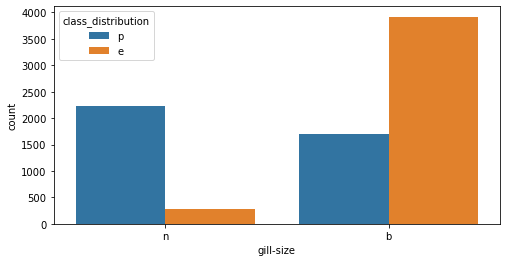

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill_color, dtype: int64


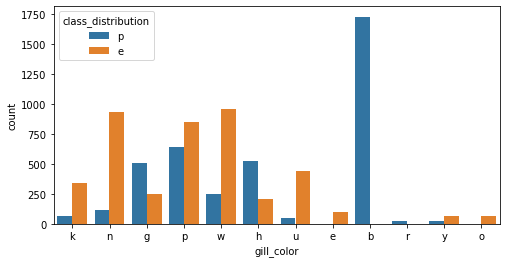

t    4608
e    3516
Name: stalk_shape, dtype: int64


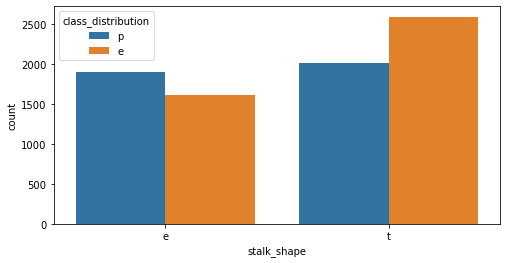

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk_root, dtype: int64


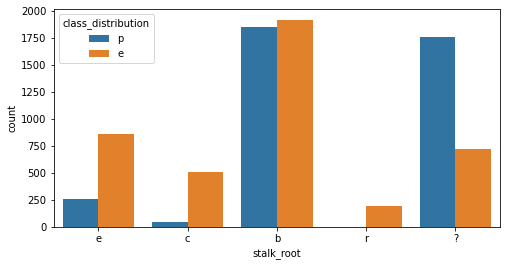

s    5176
k    2372
f     552
y      24
Name: stalk_surface-above_ring, dtype: int64


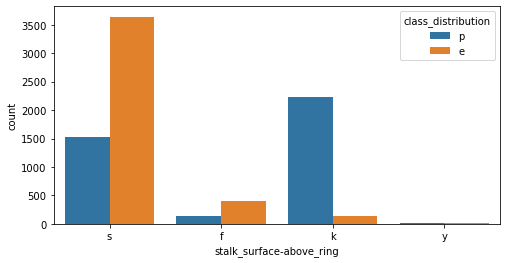

s    4936
k    2304
f     600
y     284
Name: stalk_surface_below_ring, dtype: int64


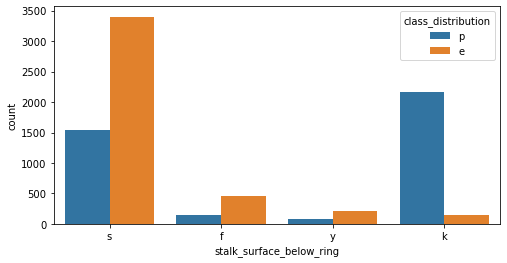

w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk_color_above_ring, dtype: int64


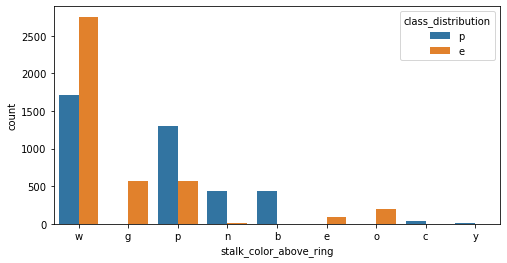

w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk_color_below_ring, dtype: int64


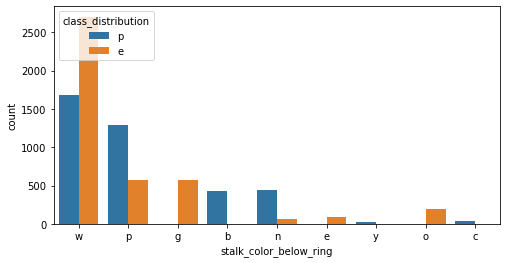

p    8124
Name: veil_type, dtype: int64


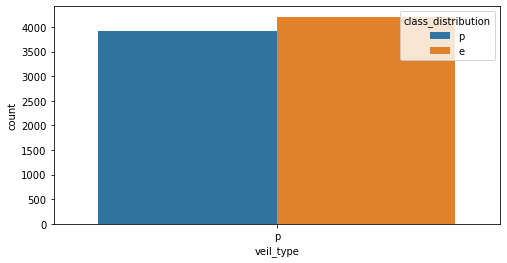

w    7924
o      96
n      96
y       8
Name: veil_color, dtype: int64


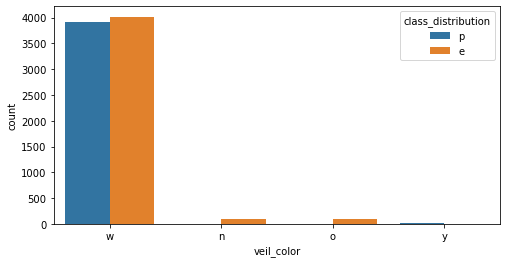

o    7488
t     600
n      36
Name: ring_number, dtype: int64


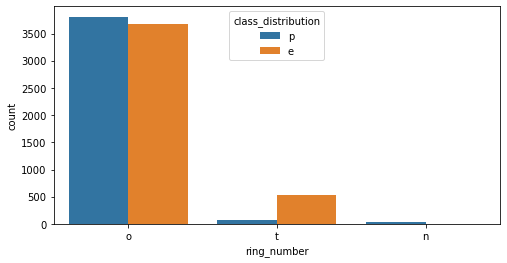

p    3968
e    2776
l    1296
f      48
n      36
Name: ring_type, dtype: int64


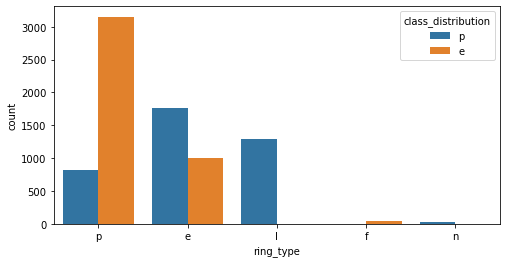

w    2388
n    1968
k    1872
h    1632
r      72
u      48
y      48
b      48
o      48
Name: spore_print_color, dtype: int64


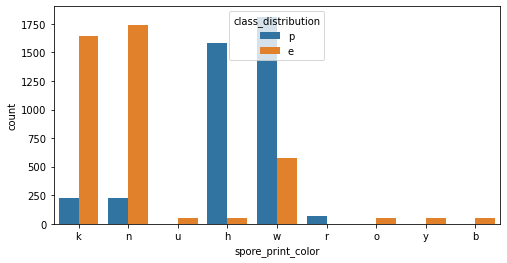

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64


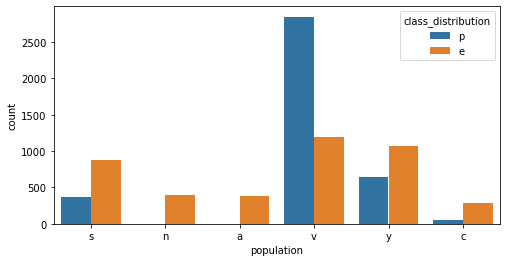

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64


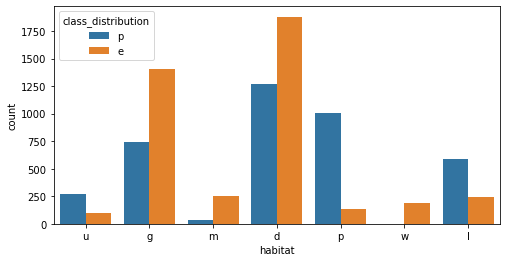

In [5]:
# Visualization for each attribute
import seaborn  as sns
for i in df1.columns:
    print(df1[i].value_counts())
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df1[i], hue=df1['class_distribution'])
    plt.show()

## Data Preprocessing

Since the 'stalk_root' column has 2480 missing values denoted by "?", I added one column named 'num' as reference for merging the obtained missing values from the KNN model. 

In [6]:
# Add one column (num) as reference 
df1['num'] = [i for i in range(len(df1))]
df1

,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill-size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,num
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,2
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,3
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,o,o,p,o,o,p,b,c,l,8119
8120,e,x,s,n,f,n,a,c,b,y,...,o,o,p,n,o,p,b,v,l,8120
8121,e,f,s,n,f,n,a,c,b,n,...,o,o,p,o,o,p,b,c,l,8121
8122,p,k,y,n,f,y,f,c,n,b,...,w,w,p,w,o,e,w,v,l,8122


In [7]:
# Inspect the information of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class_distribution        8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface-above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [8]:
# Base on df1.info(), the dataframe contains object type data.
# Thus, I changed the data type from object to category so that the data can be used in `OneHotEncoder` and `LabelEncoder`.
# Then check the changes that I made by using .info().
df1 = df1.astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class_distribution        8124 non-null   category
 1   cap_shape                 8124 non-null   category
 2   cap_surface               8124 non-null   category
 3   cap_color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill_attachment           8124 non-null   category
 7   gill_spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill_color                8124 non-null   category
 10  stalk_shape               8124 non-null   category
 11  stalk_root                8124 non-null   category
 12  stalk_surface-above_ring  8124 non-null   category
 13  stalk_surface_below_ring  8124 non-null   catego

In [9]:
# shift column 'stalk_root' to first position and num column to second position, then insert the column using insert(position, 
# column_name, first_column)
first_column = df1.pop('stalk_root')
df1.insert(0, 'stalk_root', first_column)
second_column = df1.pop('num')
df1.insert(1, 'num', second_column)
df1_col_arrange = df1
df1_col_arrange
 

,stalk_root,num,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,0,p,x,s,n,t,p,f,c,...,s,w,w,p,w,o,p,k,s,u
1,c,1,e,x,s,y,t,a,f,c,...,s,w,w,p,w,o,p,n,n,g
2,c,2,e,b,s,w,t,l,f,c,...,s,w,w,p,w,o,p,n,n,m
3,e,3,p,x,y,w,t,p,f,c,...,s,w,w,p,w,o,p,k,s,u
4,e,4,e,x,s,g,f,n,f,w,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,?,8119,e,k,s,n,f,n,a,c,...,s,o,o,p,o,o,p,b,c,l
8120,?,8120,e,x,s,n,f,n,a,c,...,s,o,o,p,n,o,p,b,v,l
8121,?,8121,e,f,s,n,f,n,a,c,...,s,o,o,p,o,o,p,b,c,l
8122,?,8122,p,k,y,n,f,y,f,c,...,k,w,w,p,w,o,e,w,v,l


In [10]:
# Create a dataframe with no missing values(?) as df1_nomissing
df1_nomissing = df1_col_arrange[df1_col_arrange.stalk_root!='?']
df1_nomissing

,stalk_root,num,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,0,p,x,s,n,t,p,f,c,...,s,w,w,p,w,o,p,k,s,u
1,c,1,e,x,s,y,t,a,f,c,...,s,w,w,p,w,o,p,n,n,g
2,c,2,e,b,s,w,t,l,f,c,...,s,w,w,p,w,o,p,n,n,m
3,e,3,p,x,y,w,t,p,f,c,...,s,w,w,p,w,o,p,k,s,u
4,e,4,e,x,s,g,f,n,f,w,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,7986,e,b,y,n,f,n,f,c,...,y,n,n,p,w,t,p,w,y,p
8001,b,8001,e,x,y,n,f,n,f,c,...,y,n,n,p,w,t,p,w,y,p
8038,b,8038,e,x,y,g,t,n,f,c,...,s,w,w,p,w,t,p,w,y,p
8095,c,8095,p,x,y,c,f,m,f,c,...,y,c,c,p,w,n,n,w,c,d


## Seperate the data into x_train, y_train,and x_test

Create a x_train dataframe with no missing values(?), and y_train dataframe with missing values only. 

In [11]:
# Prepare the x_train data as X_train_df1_nomissing 
X_train_df1_nomissing = df1_nomissing.iloc[:,2:]
X_train_df1_nomissing

,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill-size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,e,b,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8001,e,x,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8038,e,x,y,g,t,n,f,c,b,w,...,s,w,w,p,w,t,p,w,y,p
8095,p,x,y,c,f,m,f,c,b,y,...,y,c,c,p,w,n,n,w,c,d


In [12]:
# Turn x_train data in array 
X_train_df1_nomissing_array = np.array(X_train_df1_nomissing)
X_train_df1_nomissing_array

array([['p', 'x', 's', ..., 'k', 's', 'u'],
       ['e', 'x', 's', ..., 'n', 'n', 'g'],
       ['e', 'b', 's', ..., 'n', 'n', 'm'],
       ...,
       ['e', 'x', 'y', ..., 'w', 'y', 'p'],
       ['p', 'x', 'y', ..., 'w', 'c', 'd'],
       ['p', 'f', 'y', ..., 'w', 'c', 'd']], dtype=object)

In [13]:
# Prepare the y_train data as y_df1_nomissing 
y_train_df1_nomissing = df1_nomissing['stalk_root']
y_train_df1_nomissing

0       e
1       c
2       c
3       e
4       e
       ..
7986    b
8001    b
8038    b
8095    c
8114    c
Name: stalk_root, Length: 5644, dtype: category
Categories (5, object): ['?', 'b', 'c', 'e', 'r']

In [14]:
# Create a dataframe with missing values(?) as df1_missing
df1_missing = df1_col_arrange[df1_col_arrange.stalk_root=='?']
df1_missing

,stalk_root,num,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
3984,?,3984,e,x,y,b,t,n,f,c,...,s,e,w,p,w,t,e,w,c,w
4023,?,4023,p,x,y,e,f,y,f,c,...,s,w,w,p,w,o,e,w,v,p
4076,?,4076,e,f,y,u,f,n,f,c,...,f,w,w,p,w,o,f,h,y,d
4100,?,4100,p,x,y,e,f,y,f,c,...,s,p,p,p,w,o,e,w,v,d
4104,?,4104,p,x,y,n,f,f,f,c,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,?,8119,e,k,s,n,f,n,a,c,...,s,o,o,p,o,o,p,b,c,l
8120,?,8120,e,x,s,n,f,n,a,c,...,s,o,o,p,n,o,p,b,v,l
8121,?,8121,e,f,s,n,f,n,a,c,...,s,o,o,p,o,o,p,b,c,l
8122,?,8122,p,k,y,n,f,y,f,c,...,k,w,w,p,w,o,e,w,v,l


In [15]:
# Prepare the X_test data as X_test_df1_missing 
X_test_df1_missing = df1_missing.iloc[:,2:]
X_test_df1_missing

,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill-size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [16]:
# Turn x_test data in array 
X_test_df1_missing_array = np.array(X_test_df1_missing)
X_test_df1_missing_array

array([['e', 'x', 'y', ..., 'w', 'c', 'w'],
       ['p', 'x', 'y', ..., 'w', 'v', 'p'],
       ['e', 'f', 'y', ..., 'h', 'y', 'd'],
       ...,
       ['e', 'f', 's', ..., 'b', 'c', 'l'],
       ['p', 'k', 'y', ..., 'w', 'v', 'l'],
       ['e', 'x', 's', ..., 'o', 'c', 'l']], dtype=object)

## One-hot-encode  and LabelEncoder
 In order to perform the imputation using the KNeighborsClassifier algotithm, all X feature need to be one-hot-encoded and y_train_nomissing needs to be label encoded. Then, train a KNeighborsClassifier model called knn_nomissing_clf using n_neighbors= 5, after that choose the best k without weights parameter and with weights parameter in KNeighborsClassifier. Lastly, perform the cross-validation using accuracy as the test metric. Choose the best k to predict the missing value called pred. 
 

In [17]:
# One-hot-encode the x feature(X_train_df1_nomissing & X_test_df1_missing)
from sklearn.preprocessing import OneHotEncoder
x_train_nomissing_encoder = OneHotEncoder(sparse=False, handle_unknown= 'ignore' ) 
x_train_nomissing_OHE = x_train_nomissing_encoder.fit_transform(X_train_df1_nomissing)# X_df1_nomissing&missing:dataframe
x_test_missing_OHE = x_train_nomissing_encoder.transform(X_test_df1_missing)
print(np.array(x_train_nomissing_OHE))
print(np.array(x_test_missing_OHE))

[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [18]:
# label encode the response data (y_train_df1_nomissing)
from sklearn import preprocessing
y_train_nomissing_le = preprocessing.LabelEncoder()
y_train_encode = y_train_nomissing_le.fit_transform(y_train_df1_nomissing)
y_train_encode

array([2, 1, 1, ..., 0, 1, 1])

In [19]:
# Check the assigned values for each categories
pd.DataFrame(y_train_encode).value_counts()

0    3776
2    1120
1     556
3     192
dtype: int64

In [20]:
# Check the dimension of x_train_nomissing_OHE and 
print(y_train_encode.shape)
print(x_train_nomissing_OHE.shape)
print(x_test_missing_OHE.shape)

(5644,)
(5644, 96)
(2480, 96)


## Question 1:
Why don't we one-hot encode the response data to train the KNN model instead?

#### Answer: 


Since the response data values are e, c, b, and r, `LabelEncoding` will turn each of these values in a column to a number. The assigned numbers are in alphabetical order where b represented by 0, c is represented by 1 , e represented by 2 and r represented by 3. All of these assigned numbers are not related to each other. They do not have relationship as follows: 0 < 1 < 2 < 3. `LabelEncoding`and `OneHotEncoder` are approach to encode the categorical features. Hence,  I am very sure it is still be possible to train the KNN model using `OneHotEncoder` to the 'stalk_root'. It is because the 'stalk_root' is a categorical data. 

The response data('stalk_root') for this KNN model comprises four categories['e' 'c' 'b' 'r']. Therefore, if I apply the `OneHotEncoder` to the response data, it will generates 4 new columns only. In theory, many columns or too many predictors is challenging and will lower the accuracy of the model but these do not affect the KNN model for this dataset. Besides, I have tried it and it also produced the same result as the `LabelEncoding` method. 

Using `LabelEncoding` may cause the misinterpreting by the algorithms about the data is ordinal data. It is due to the assigned numerics value are between 0 and the number of classes minus 1. Thus, the alternative for this situation is choose the `OneHotEncoder`.

## KNeighborsClassifier Model

    Accuracy
k           
1   0.983341
3   0.983341
5   0.989540
7   0.989539
9   0.989894
11  0.989539
13  0.989539
15  0.989362
17  0.989362
19  0.989184
21  0.989184
23  0.989184
25  0.989184
27  0.988830
29  0.989007


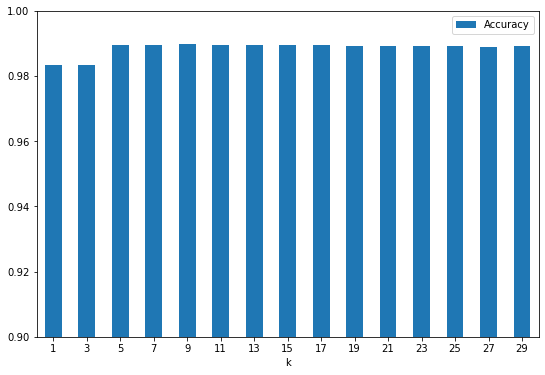

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Choose the best k with weights parameter in KNeighborsClassifier

n_neighbors = list(range(1,30, 2))
cv_scores =[]

for k in n_neighbors:
    knn_nomissing_clf2 = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski',weights='distance')
    knn_nomissing_clf2.fit(x_train_nomissing_OHE,y_train_encode)
    scores= cross_val_score(knn_nomissing_clf2, x_train_nomissing_OHE, y_train_encode, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores_df = pd.DataFrame({"k": [k for k in n_neighbors],
                            "Accuracy": cv_scores}).set_index("k")
print(cv_scores_df)
cv_scores_df.plot.bar(figsize=(9,6), ylim=(0.9, 1.0), rot=0)

plt.show()


    Accuracy
k           
1   0.983341
3   0.983341
5   0.989540
7   0.988830
9   0.989184
11  0.989184
13  0.988830
15  0.989007
17  0.989007
19  0.988830
21  0.988830
23  0.989007
25  0.989007
27  0.988830
29  0.988830


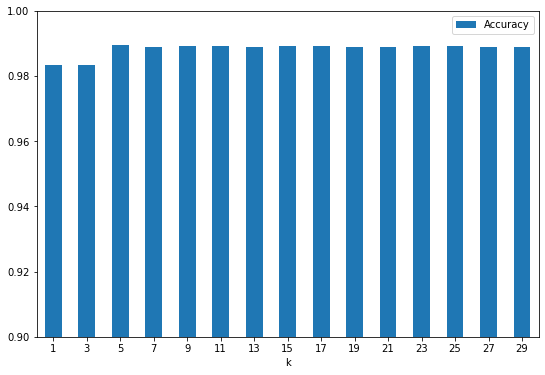

In [22]:
n_neighbors = list(range(1,30, 2))
cv_scores3 =[]

# Choose the best k without weights parameter in KNeighborsClassifier

for k in n_neighbors:
    knn_nomissing_clf3 = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn_nomissing_clf3.fit(x_train_nomissing_OHE,y_train_encode)
    #pred2 = knn_nomissing_clf2.predict(x_test_missing_OHE)
    #ks.append(pred2)
    scores3= cross_val_score(knn_nomissing_clf3, x_train_nomissing_OHE, y_train_encode, cv=10, scoring='accuracy')
    cv_scores3.append(scores3.mean())
cv_scores_df3 = pd.DataFrame({"k": [k for k in n_neighbors],
                            "Accuracy": cv_scores3}).set_index("k")
print(cv_scores_df3)
cv_scores_df3.plot.bar(figsize=(9,6), ylim=(0.9, 1.0), rot=0)
#plt.plot(list(range(1,30,1)), ks)
plt.show()

In [23]:
# From the above result, cross_validation using accuracy as the test metric, k=9 shown the best accuracy
# Train a KNeighborsClassifier Model called knn_nomissing_clf using n_neighbors= 9 and predict the missing value called pred

knn_nomissing_clf = KNeighborsClassifier(n_neighbors=9, p=2, metric='minkowski',weights='distance')
knn_nomissing_clf.fit(x_train_nomissing_OHE,y_train_encode)
pred = knn_nomissing_clf.predict(x_test_missing_OHE)
pred

array([0, 0, 2, ..., 2, 0, 2])

In [24]:
# convert the pred values back to original values
missing_values_y = y_train_nomissing_le.inverse_transform(pred)
missing_values_y

array(['b', 'b', 'e', ..., 'e', 'b', 'e'], dtype=object)

In [25]:
# create a dataframe for all obtained missing value
missing_values_df = pd.DataFrame({'stalk_root':missing_values_y})
missing_values_df

,stalk_root
0,b
1,b
2,e
3,b
4,b
...,...
2475,e
2476,e
2477,e
2478,b


In [26]:
# Display all the missing values in list
missing_values= missing_values_df['stalk_root'].to_list()
missing_values

['b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'e',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'e',
 'b'

In [27]:
# Display the first 10 instances of missing_values
missing_values[0:10] #['b', 'b', 'e', 'b', 'b', 'b', 'b', 'b', 'b', 'e']

['b', 'b', 'e', 'b', 'b', 'b', 'b', 'b', 'b', 'e']

In [28]:
# Assign the obtained missing values in list into df1_missing 
pre_list = missing_values_y.tolist()
df1_missing = df1_missing.assign(stalk_root2 = pre_list)
df1_missing2 = df1_missing.drop('stalk_root', axis=1)
df1_missing2.head(10)

,num,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill-size,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_root2
3984,3984,e,x,y,b,t,n,f,c,b,...,e,w,p,w,t,e,w,c,w,b
4023,4023,p,x,y,e,f,y,f,c,n,...,w,w,p,w,o,e,w,v,p,b
4076,4076,e,f,y,u,f,n,f,c,n,...,w,w,p,w,o,f,h,y,d,e
4100,4100,p,x,y,e,f,y,f,c,n,...,p,p,p,w,o,e,w,v,d,b
4104,4104,p,x,y,n,f,f,f,c,n,...,p,p,p,w,o,e,w,v,l,b
4196,4196,p,x,y,n,f,y,f,c,n,...,p,p,p,w,o,e,w,v,d,b
4200,4200,p,x,y,n,f,y,f,c,n,...,p,w,p,w,o,e,w,v,l,b
4283,4283,e,f,s,p,t,n,f,c,b,...,w,w,p,w,t,e,w,c,w,b
4291,4291,e,k,s,p,t,n,f,c,b,...,w,e,p,w,t,e,w,c,w,b
4326,4326,e,x,y,r,f,n,f,c,n,...,w,w,p,w,o,f,h,v,d,e


In [29]:
# create a data frame called df1_missing3 with two columns only from df1_missing2 which are 'num'and 'stalk_root2'
df1_missing3 = df1_missing2[['num', 'stalk_root2']]
df1_missing3

,num,stalk_root2
3984,3984,b
4023,4023,b
4076,4076,e
4100,4100,b
4104,4104,b
...,...,...
8119,8119,e
8120,8120,e
8121,8121,e
8122,8122,b


## Merge the missing values to the original dataframe

After converting the obtained pred values back to letter by using `inverse_transform()`, I put those values back as a new column('stalk_root2') into the dataframe of df1_missing and save it as df1_missing2. To impute the missing values back into the original data set, I used merge method to combine the df1_col_arrange with df1_missing2 on 'num' column. From merged data, I dropped the unneccesary columns to form a completed dataframe called full_data. 

In [30]:
# Merge the df1_col_arrange and df1_missing3 to form a complete dataframe called merge_df 
merge_df = pd.merge(df1_col_arrange, df1_missing3, on= 'num', how='left')
merge_df

,stalk_root,num,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_root2
0,e,0,p,x,s,n,t,p,f,c,...,w,w,p,w,o,p,k,s,u,NaN
1,c,1,e,x,s,y,t,a,f,c,...,w,w,p,w,o,p,n,n,g,NaN
2,c,2,e,b,s,w,t,l,f,c,...,w,w,p,w,o,p,n,n,m,NaN
3,e,3,p,x,y,w,t,p,f,c,...,w,w,p,w,o,p,k,s,u,NaN
4,e,4,e,x,s,g,f,n,f,w,...,w,w,p,w,o,e,n,a,g,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,?,8119,e,k,s,n,f,n,a,c,...,o,o,p,o,o,p,b,c,l,e
8120,?,8120,e,x,s,n,f,n,a,c,...,o,o,p,n,o,p,b,v,l,e
8121,?,8121,e,f,s,n,f,n,a,c,...,o,o,p,o,o,p,b,c,l,e
8122,?,8122,p,k,y,n,f,y,f,c,...,w,w,p,w,o,e,w,v,l,b


In [31]:
# Change the dtype of merge_df to object
merge_df= merge_df.astype('object')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   stalk_root                8124 non-null   object
 1   num                       8124 non-null   object
 2   class_distribution        8124 non-null   object
 3   cap_shape                 8124 non-null   object
 4   cap_surface               8124 non-null   object
 5   cap_color                 8124 non-null   object
 6   bruises                   8124 non-null   object
 7   odor                      8124 non-null   object
 8   gill_attachment           8124 non-null   object
 9   gill_spacing              8124 non-null   object
 10  gill-size                 8124 non-null   object
 11  gill_color                8124 non-null   object
 12  stalk_shape               8124 non-null   object
 13  stalk_surface-above_ring  8124 non-null   object
 14  stalk_surface_below_ring

In [32]:
# Fill the NaN in column 'stalk_root2' with the values in column 'stalk_root'
merge_df['stalk_root2'].fillna(merge_df['stalk_root'], inplace=True)
merge_df

,stalk_root,num,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_root2
0,e,0,p,x,s,n,t,p,f,c,...,w,w,p,w,o,p,k,s,u,e
1,c,1,e,x,s,y,t,a,f,c,...,w,w,p,w,o,p,n,n,g,c
2,c,2,e,b,s,w,t,l,f,c,...,w,w,p,w,o,p,n,n,m,c
3,e,3,p,x,y,w,t,p,f,c,...,w,w,p,w,o,p,k,s,u,e
4,e,4,e,x,s,g,f,n,f,w,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,?,8119,e,k,s,n,f,n,a,c,...,o,o,p,o,o,p,b,c,l,e
8120,?,8120,e,x,s,n,f,n,a,c,...,o,o,p,n,o,p,b,v,l,e
8121,?,8121,e,f,s,n,f,n,a,c,...,o,o,p,o,o,p,b,c,l,e
8122,?,8122,p,k,y,n,f,y,f,c,...,w,w,p,w,o,e,w,v,l,b


In [33]:
# Drop coulumns 'stalk_root' and 'num' = merge_df = merge_df.drop(['stalk_root', 'num'], axis=1)
merge_df = merge_df.drop(['stalk_root', 'num'], axis=1)
merge_df

,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill-size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_root2
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,e
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,c
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,c
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,e
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,o,o,p,o,o,p,b,c,l,e
8120,e,x,s,n,f,n,a,c,b,y,...,o,o,p,n,o,p,b,v,l,e
8121,e,f,s,n,f,n,a,c,b,n,...,o,o,p,o,o,p,b,c,l,e
8122,p,k,y,n,f,y,f,c,n,b,...,w,w,p,w,o,e,w,v,l,b


In [34]:
# rename the 'stalk_root2' to 'stalk_root' and form a complete dataframe without any missing value as full_data
merge_df.rename(columns = {'stalk_root2':'stalk_root'}, inplace=True) 
full_data = merge_df
full_data

,class_distribution,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill-size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_root
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,e
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,c
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,c
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,e
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,o,o,p,o,o,p,b,c,l,e
8120,e,x,s,n,f,n,a,c,b,y,...,o,o,p,n,o,p,b,v,l,e
8121,e,f,s,n,f,n,a,c,b,n,...,o,o,p,o,o,p,b,c,l,e
8122,p,k,y,n,f,y,f,c,n,b,...,w,w,p,w,o,e,w,v,l,b


In [35]:
# Check the full_data information
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class_distribution        8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_surface-above_ring  8124 non-null   object
 12  stalk_surface_below_ring  8124 non-null   object
 13  stalk_color_above_ring    8124 non-null   object
 14  stalk_color_below_ring  

In [36]:
# Change the full data  object type to category type
full_data = full_data.astype('category')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class_distribution        8124 non-null   category
 1   cap_shape                 8124 non-null   category
 2   cap_surface               8124 non-null   category
 3   cap_color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill_attachment           8124 non-null   category
 7   gill_spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill_color                8124 non-null   category
 10  stalk_shape               8124 non-null   category
 11  stalk_surface-above_ring  8124 non-null   category
 12  stalk_surface_below_ring  8124 non-null   category
 13  stalk_color_above_ring    8124 non-null   catego

 ## Prepare the data for model training
 
Select the features data and response as feature_x and response respectively. After this, I did `OneHotEncoder` and `LabelEncoder`to the feature_x and response. Then I applied the encoded feature x and encoded response to split the data into X_train, X_test, y_train and y_test using train_test_split.  

In [37]:
# Select the feature data  as feature_X and target data as response 
feature_X = full_data.drop('class_distribution', axis=1)
response = full_data['class_distribution']

In [38]:
feature_X

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill-size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_root
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,e
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,c
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,c
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,e
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,b


In [39]:
response

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class_distribution, Length: 8124, dtype: category
Categories (2, object): ['e', 'p']

In [40]:
# One-hot encode the feature_X with OneHotEncoder
feature_X_encoder = OneHotEncoder(drop='first', sparse=False) #, handle_unknown= 'ignore'
feature_X_OHE = feature_X_encoder.fit_transform(feature_X)
feature_X_OHE

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [41]:
# Check the dimension of feature_X_OHE
feature_X_OHE.shape

(8124, 94)

In [42]:
# label encode the response data (response)
response_le = preprocessing.LabelEncoder()
response_encode = response_le.fit_transform(response)
response_encode

array([1, 0, 0, ..., 0, 1, 0])

In [43]:
# Check the dimension of response_encode
response_encode.shape

(8124,)

## Question 2:
Why don't we train these two models by one-hot encoding the response data? 

#### Answer: 

Since the response data are binary data with values 'e' and 'p', `LabelEncoding` will turn each of these values in a column to a number. Thus, 'e' will denoted by 0 and 'p' is denoted by 1. However, it is still be possible to train the two models by  `OneHotEncode` the response data. As I mentioned above, `LabelEncoding`and `OneHotEncoder` are approach to encode the categorical features. The response data(classs) is a categorical data. 

If we use `OneHotEncode`, this will create a new column for each category. Therefore, it will generate 2 new columns only. So it will generate the same accuracy for these two models. Normally if the response data has many unique values, then it will lead to multicollineaerity problems. Here, the response data only has 2 unique values. So, It would not be a problem to use `OneHotEncode` to the response data for this dataset.

In [44]:
# Split the feature_X_OHE and response_encode into X_train, X_test, y_train and y_test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(feature_X_OHE, response_encode, test_size= 0.20, random_state=42) 

In [45]:
# print the dimension of X_train, y_train, X_test and y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6499, 94)
(6499,)
(1625, 94)
(1625,)


In [46]:
# Displat the X_train
X_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [47]:
# Displat the X_test
X_test

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
# Displat the y_train
y_train

array([1, 1, 1, ..., 0, 1, 0])

In [49]:
# Displat the y_test
y_test

array([0, 1, 1, ..., 1, 1, 1])

## Model Training for Full dataset

The X_train and y_train are fitted in RandomForestClassifier model and LogisticRegression model. The time of fitting for both models were taken for comparing the time it takes to complete a model training through the magic command %% time.  Besides, the class_distribution were predicted with these models.  Computation for accuracy_score, precision_score and recall_score were performed too.

In [50]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from time import time

# Train a RandomForestClassifier model called clf_model, calculate the fitting time and display the prediction on X_test
start1 = time()
clf_model = RandomForestClassifier(random_state = 42)
clf_model.fit(X_train, y_train)
train_time1 = time()-start1
print("clf_model_training_time: ",train_time1,"s")
pred_clf = clf_model.predict(X_test)
pred_clf

clf_model_training_time:  0.2672851085662842 s
Wall time: 343 ms


array([0, 1, 1, ..., 1, 1, 1])

In [51]:
%%time

# Train a LogisticRegression model called lr_model, calculate the fitting time and display the prediction on X_test
start2 = time()
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
train_time2 = time()-start2
print('lr_model_training_time: ', train_time2,"s")
pred_lr = lr_model.predict(X_test)
pred_lr

lr_model_training_time:  0.04089021682739258 s
Wall time: 41.9 ms


array([0, 1, 1, ..., 1, 1, 1])

In [52]:
# Perform the accuracy, precision and recall for clf_model and  lr_models

from sklearn.metrics import accuracy_score,precision_score, recall_score

clf_accuracy1 = accuracy_score(y_test, pred_clf)
lr_accuracy1 = accuracy_score(y_test, pred_lr)

clf_precision1 = precision_score(y_test, pred_clf)
lr_precision1 = precision_score(y_test, pred_lr)

clf_recall1 = recall_score(y_test, pred_clf)
lr_recall1 = recall_score(y_test, pred_lr)

# Calculate the accuracy, precision score and recall score     
print ("clf_model_Accuracy : ", clf_accuracy1)
print ("lr_model_Accuracy : ", lr_accuracy1)

# Sklearn Precision Score
print("clf_model_Precision :", clf_precision1)
print("lr_model_Precision :", lr_precision1)

# Sklearn Recall Score
print("clf_model_Recall :", clf_recall1)
print("lr_model_Recall :", lr_recall1)



clf_model_Accuracy :  1.0
lr_model_Accuracy :  1.0
clf_model_Precision : 1.0
lr_model_Precision : 1.0
clf_model_Recall : 1.0
lr_model_Recall : 1.0


### Discussion:

The results showed clf_model and lr_model have same value of accuracy, precision and recall which are equal to 1. This means all the predicted values are identical to the y_test. This indicates these models are super overfitting. One of the ways to avoid the overfitting is to reduce the number of dimensions. For this assignment, I need to calculate the minimum number of dimensions required to preserve 95% of the variance. 

 ## Perform PCA Reduction
 
 In order to preserve 95% of the variance, I calculate d which is the minimum number of dimensions required to preserve 95%. 

In [53]:
from sklearn.decomposition import PCA

# Perform PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95%
pca =PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

38

In [54]:
# return the PCA with n_components= 0.95 indicate the ratio of variance i wish to preserve and display the reduced X_train
# fit_transform the X_train and name the reduced X_train as X_reduced

from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced

array([[ 0.76970338,  1.73525593,  0.42509532, ..., -0.0770993 ,
         0.20276979,  0.05372311],
       [ 0.70253482,  1.25389946,  0.91164644, ..., -0.07769588,
        -0.11758079, -0.03362545],
       [ 0.33860695,  1.75720633, -0.36737376, ...,  0.21187962,
         0.04345239,  0.1627639 ],
       ...,
       [-0.73193336, -0.51639362, -0.53748171, ...,  0.20328179,
        -0.52018323,  0.23070464],
       [ 0.85131386,  1.79457082, -0.24013055, ...,  0.18556825,
        -0.03564271,  0.04140234],
       [-0.42811095, -0.56937606,  1.5251318 , ...,  0.11981418,
        -0.08867231, -0.07978534]])

In [55]:
# Check the dimension of X_reduced
X_reduced.shape

(6499, 38)

In [56]:
# Confirm the number of features left after reducing dimensionality
pca.n_components_

38

In [57]:
# Calculate the percentage of reducing the number of dimensions of the training set from 94 to 38 dimension
loss = 1-pca.explained_variance_ratio_.sum()
loss_percentage = loss*100.0
print(round(loss, 3))
print(round(loss_percentage, 3),"%")


0.047
4.683 %


The number of dimensions required to preserve 95% is 38. The percentage of reducing the number of dimensions from 94 to 38 dimension of the training data is 4.683%.
    

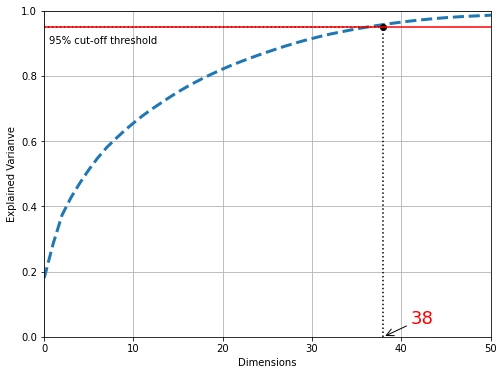

In [58]:
# Plot the explained variance as a function of the number of dimensions
plt.figure(figsize=(8, 6))
plt.plot(cumsum, linestyle='--', linewidth=3)#marker='*'
plt.axis([0, 50, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Varianve")
plt.plot([d,d], [0,0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.plot([0,d], [0.95, 0.95], "k:")
plt.axhline(y=0.95, color='r', linestyle='-')
plt.annotate("95% cut-off threshold", xy=(0.5, 0.90))
plt.annotate("38", xy=(38, 0.00), xytext=(41, 0.04), arrowprops=dict(arrowstyle='->'), fontsize=18, c='r')
plt.grid(True)
plt.show()


In [59]:
# Transform the X_test and name the reduced X_test as X_test_reduced
X_test_reduced = pca.transform(X_test)
X_test_reduced

array([[-0.83692602, -0.34619258,  1.22460284, ...,  0.10594315,
        -0.14203114, -0.09773833],
       [ 0.53987656,  1.98132281, -0.33797908, ...,  0.37513669,
         0.01590945,  0.14546641],
       [ 1.05307829,  1.34868045, -0.01401712, ...,  0.12246568,
        -0.31218302,  0.04557795],
       ...,
       [ 2.00734734,  1.1936828 , -0.33581182, ..., -0.11643662,
        -0.1875336 , -0.0861651 ],
       [ 1.25570874,  1.78367928, -0.45092647, ..., -0.09826318,
         0.12958654, -0.07125233],
       [ 2.22962245, -1.61716148, -0.10894336, ...,  0.37701918,
         0.19854193,  0.16988552]])

In [60]:
# Check the dimension of X_test_reduced
X_test_reduced.shape

(1625, 38)

## Model Training for PCA reduced dataset

Train two new models for this PCA reduced dataset, a RandomForestClassifier model and LogisticRegression model called clf_model2 and lr_model2. Again, time of the training of these two models were calculated as above. Computation for accuracy_score, precision_score and recall_score were performed one more time.

In [61]:
%%time

# Train a RandomForestClassifier model called clf_model, calculate the fitting time and display the prediction on X_test_reduced

start3 = time()
clf_model2 = RandomForestClassifier(random_state = 42)
clf_model2.fit(X_reduced, y_train)
train_time3 = time()-start3
print("clf_model2_training_time: ",train_time3,"s")
pred_clf_model2 = clf_model2.predict(X_test_reduced)
pred_clf_model2

clf_model2_training_time:  1.6785917282104492 s
Wall time: 1.7 s


array([0, 1, 1, ..., 1, 1, 1])

In [62]:
%%time

# Train a LogisticRegression model called lr_model, calculate the fitting time and display the prediction on X_test_reduced

start4 = time()
lr_model2 = LogisticRegression()
lr_model2.fit(X_reduced, y_train)
train_time4 = time()-start4
print('lr_model2_training_time: ', train_time4 ,"s")
pred_lr_model2 = lr_model2.predict(X_test_reduced)
pred_lr_model2

lr_model2_training_time:  0.0249330997467041 s
Wall time: 25.9 ms


array([0, 1, 1, ..., 1, 1, 1])

In [63]:
# Calculate the accuracy, precision score and recall score for clf_model2 and lr_model2     

clf_accuracy2 = accuracy_score(y_test, pred_clf_model2)
lr_accuracy2 = accuracy_score(y_test, pred_lr_model2)

clf_precision2 = precision_score(y_test, pred_clf_model2)
lr_precision2 = precision_score(y_test, pred_lr_model2)

clf_recall2 = recall_score(y_test, pred_clf_model2)
lr_recall2 = recall_score(y_test, pred_lr_model2)

print ('clf_model2_Accuracy : %5.4f'%(clf_accuracy2))
print ('lr_model2_Accuracy : %5.4f'%(lr_accuracy2))

# Sklearn Precision Score
print('clf_model2_Precision :%5.4f'%(clf_precision2))
print('lr_model2_Precision :%5.4f'%(lr_precision2))

# Sklearn Recall Score
print('clf_model2_Recall :%5.4f'%(clf_recall2))
print('lr_model2_Recall :%5.4f'%(lr_recall2))


clf_model2_Accuracy : 1.0000
lr_model2_Accuracy : 0.9926
clf_model2_Precision :1.0000
lr_model2_Precision :0.9923
clf_model2_Recall :1.0000
lr_model2_Recall :0.9923


### Discussion:

For this PCA reduced data, the results showed RandomForestClassifier model(clf_model2) has perfect value of accuracy, precision and recall which are equal to 1. This means all the predicted values are identical to the y_test. This indicates the model is  overfitting. However, the LogisticRegression model(lr_model2) had a little differences in those values. The accuracy, precision and recall for lr_model2 are 0.9926, 0.9923 and 0.9923 respectively. And the training time for LogisticRegression model is shorter than RandomForestClassifier model.

###  Analysis without training time actual value
The training time is varying each time I run the code. So I used the a and b to represent the training time. 

|Models              |Item             |Full Data   |PCA Reduced|
|-----------------   |---------------  |------------|-----------|
|Random Forest       |Accuracy         |   1.000    |   1.000   |
|                    |Precision        |   1.000    |   1.000   |
|                    |Recall           |   1.000    |   1.000   |
|                    |Time             |   a        |   > a     |
|Logistic Regression |Accuracy         |   1.000    |   0.9926  |
|                    |Precision        |   1.000    |   0.9923  |
|                    |Recall           |   1.000    |   0.9923  |
|                    |Time             |   b        |   < b     |




## Final Analysis

In [64]:
models= ['Random Forest', 'Logistic Regression']
Item = ['Accuracy','Precision','Recall','Time']
for i in models:
    if i == 'Random Forest':
        print('Models             ','Item      ','Full Data    ','PCA Reduced')
        print(i,'     ','Accuracy   %5.4f'%(clf_accuracy1),'         %5.4f'%(clf_accuracy2))
        print('                   ','Precision  %5.4f'%(clf_precision1),'         %5.4f'%(clf_precision2))
        print('                   ','Recall     %5.4f'%(clf_recall1),'         %5.4f'%(clf_recall2))
        print('                   ','Time       %5.4f'%(train_time1), '         %5.4f'%(train_time3))
    else:
        print(i,'Accuracy   %5.4f'%(lr_accuracy1), '         %5.4f'%(lr_accuracy2))
        print('                   ','Precision  %5.4f'%(lr_precision1), '         %5.4f'%(lr_precision2))
        print('                   ','Recall     %5.4f'%(clf_recall1), '         %5.4f'%(lr_recall2))
        print('                   ','Time       %5.4f'%(train_time2),'         %5.4f'%(train_time4))
        

Models              Item       Full Data     PCA Reduced
Random Forest       Accuracy   1.0000          1.0000
                    Precision  1.0000          1.0000
                    Recall     1.0000          1.0000
                    Time       0.2673          1.6786
Logistic Regression Accuracy   1.0000          0.9926
                    Precision  1.0000          0.9923
                    Recall     1.0000          0.9923
                    Time       0.0409          0.0249


## Conclusion: 

The full dataset has a 8124 x 94 dimension for its' feature x. There were two models which are Random Forest model and Logistic Regression model. They were trained in predicting whether a mushroom is edible or poisonous. The full dataset shows the perfect prediction with 1.0 values in accuracy, precision and recall for both models. This means all predicted values were 100% match with the y_test. This is perfect and extremely overfitting.

The PCA algorithms was used to reduce the dimension of the full dataset from 94 to 38 when keep 95% of the variance. Using PCA had reduced the training set by 4.683 % in dimension. After using the PCA reduced data, accuracy, precision, and recall for the Random Forest Model still maintain the same which is 1.0. However the Logistic Regression Model had a little reduced in those values which are 0.9926, 0.9923 and 0.9923 for the accuracy, precision and recall respectively. 

For the traning time, I noticed that the Random Forest Model has shorter performance time in full dataset compared with PCA reduced dataset. Meaning to say, after doing the PCA using Scikit_Learn the training time became longer even the dimensionality were reduced. Hence, the reduction of the data dimension may not always be faster then how the model processes and it depends on the data. However, the Logistic Regression Model had performed faster in PCA reduced data for this dataset. 